<p><b>Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.</b></p>

<p><b>Why Clustering?</b></p>

<p><b>Clustering is a widely used technique in the industry. It is actually being used in almost every domain, ranging from banking to recommendation engines, document clustering to image segmentation.</b></p>

<p><b>In image segmentation, similar pixels in the image are grouped together by applying clustering to create clusters having similar pixels in the same group.</b></p>

<p><b>K-Means clustering is an unsupervised algorithm and it was applied to sets of images to detect the dominant colors in them</b></p>

In [1]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2

In [18]:
# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex
print(rgb2hex([255, 0, 0]))

#def rgb_to_hex(rgb):
#    return '%02x%02x%02x' % rgb
#rgb_to_hex((255, 255, 195))

#ff0000


In [19]:
def plot_color_dect(path, k=6):
    # load image
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # preprocess the images by resizing them to speed up processing time
    resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

    # reshape the image to be a list of pixels
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

    # k-Means cluster algorithm was applied to train the data
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(img_list)
        
    # count labels to find most popular
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())

    # group the most popular centroid
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    # plots
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')
    plt.show()

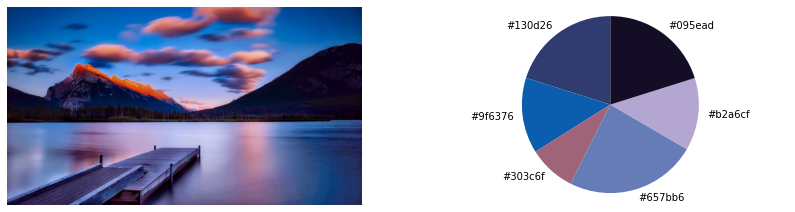

In [20]:
plot_color_dect('image_0.jpg')

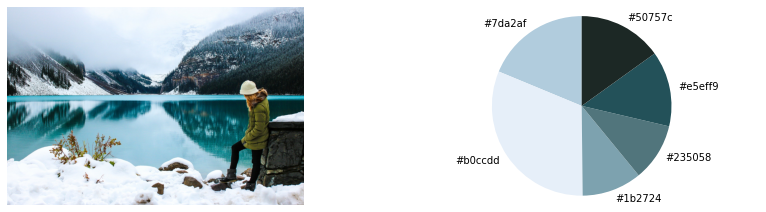

In [21]:
plot_color_dect('image_1.jpg')

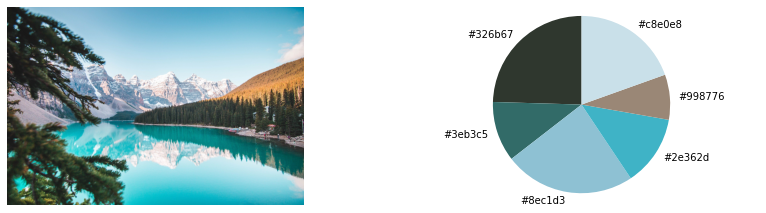

In [22]:
plot_color_dect('image_2.jpg')